Starting batch processing...
Conversion rate (Theoretical): 1 Fringe = 0.1818 microns (based on 5.5 fringes/micron)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\1tick\1tick_1.npy... OK (Abs Fringes: 5.652)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\1tick\1tick_2.npy... OK (Abs Fringes: 5.579)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\1tick\1tick_3.npy... OK (Abs Fringes: 6.279)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\1tick\1tick_4.npy... OK (Abs Fringes: 5.634)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\1tick\1tick_5.npy... OK (Abs Fringes: 6.083)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\2tick\2tick_1.npy... OK (Abs Fringes: 11.902)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\2tick\2tick_2.npy... OK (Abs Fringes: 13.637)
Processing: D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise\2tick\2tick_3.npy... OK (Abs Fringes: 11.939)
Processing: D:\TE

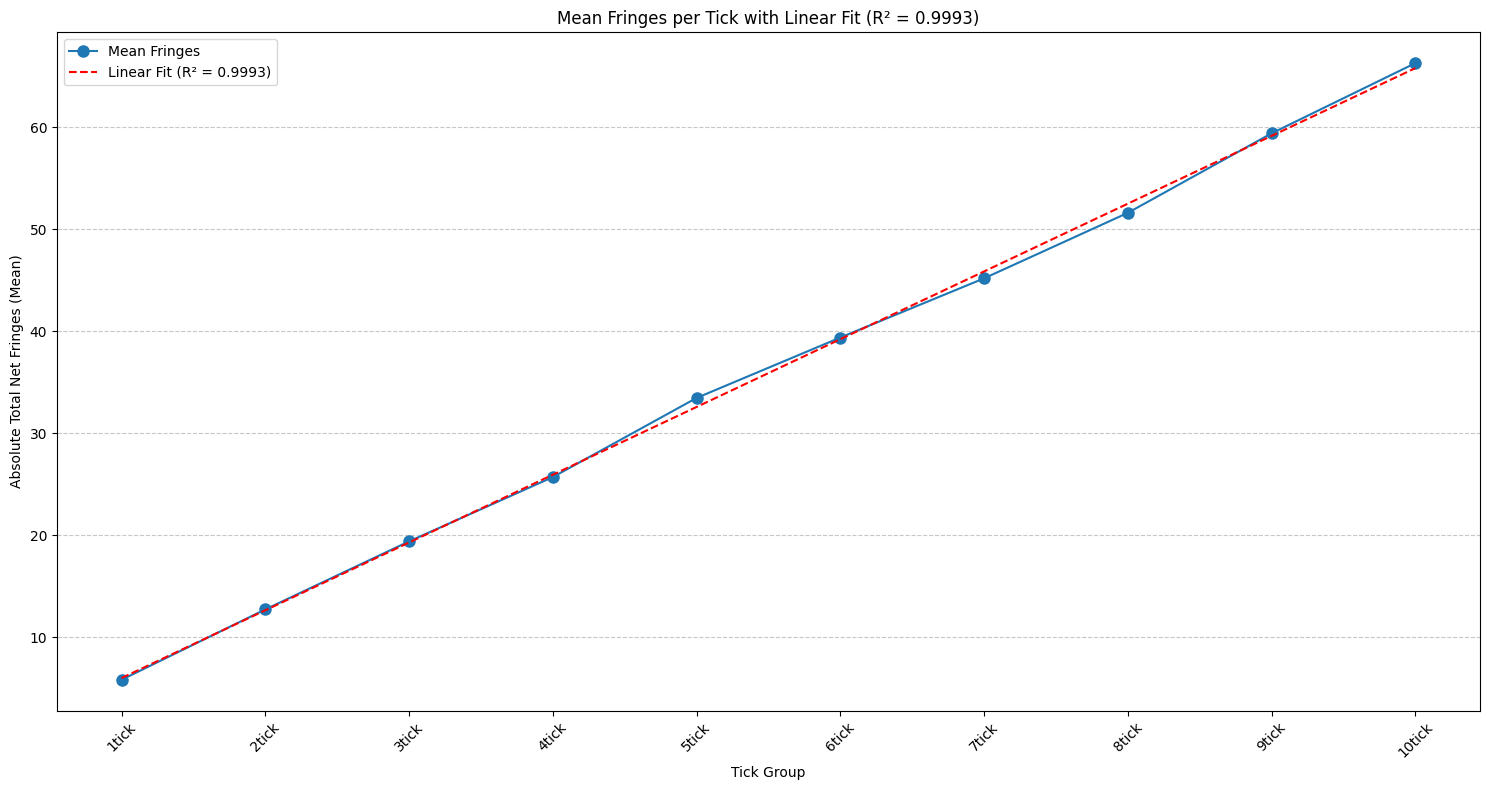



     กราฟที่ 2: Distance (microns) vs Tick
distance [ 1.06282438  2.31626413  3.52836828  4.67390569  6.08358327  7.15953668
  8.21427737  9.381092   10.79747387 12.04778799]
Distance Linear Regression R-squared (R²) score: 0.9993


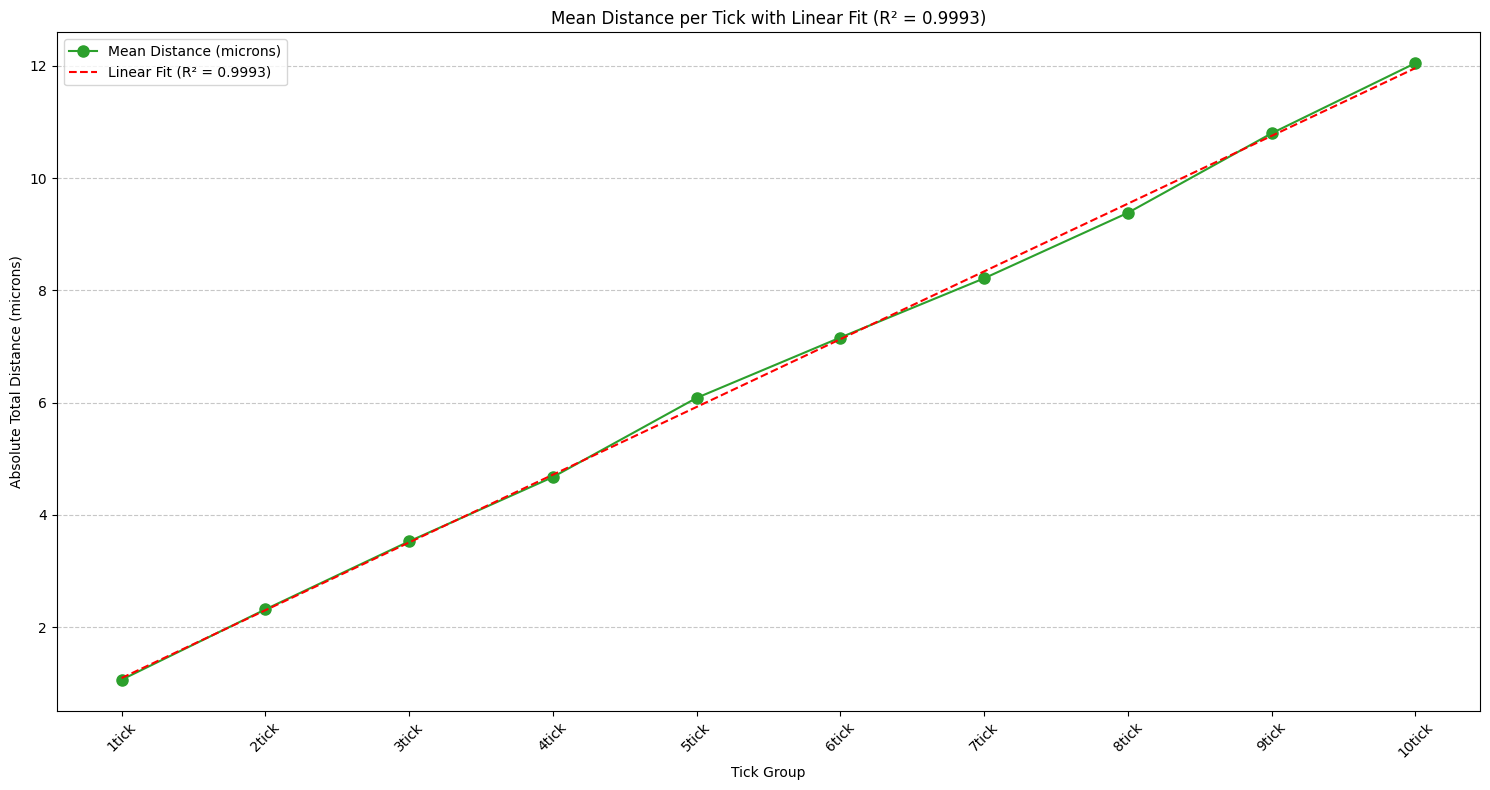

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats 

# --- ส่วนที่ 0: ตั้งค่า (เหมือนเดิม + เพิ่มค่าแปลง) ---
MEM_MAX_FRAMES = [480, 600, 720, 840, 960, 1080, 1200, 1320, 1440, 1560]
MEM_tick = ["1tick", "2tick", "3tick", "4tick", "5tick", "6tick", "7tick", "8tick", "9tick", "10tick"]
MEM_TARGET_FILE_NAME = [
    "1tick_1.npy", "1tick_2.npy", "1tick_3.npy", "1tick_4.npy", "1tick_5.npy",
    "2tick_1.npy", "2tick_2.npy", "2tick_3.npy", "2tick_4.npy", "2tick_5.npy",
    "3tick_1.npy", "3tick_2.npy", "3tick_3.npy", "3tick_4.npy", "3tick_5.npy",
    "4tick_1.npy", "4tick_2.npy", "4tick_3.npy", "4tick_4.npy", "4tick_5.npy",
    "5tick_1.npy", "5tick_2.npy", "5tick_3.npy", "5tick_4.npy", "5tick_5.npy",
    "6tick_1.npy", "6tick_2.npy", "6tick_3.npy", "6tick_4.npy", "6tick_5.npy",
    "7all_1.npy", "7tick_2.npy", "7tick_3.npy", "7tick_4.npy", "7tick_5.npy",
    "8tick_1.npy", "8tick_2.npy", "8tick_3.npy", "8tick_4.npy", "8tick_5.npy",
    "9tick_1.npy", "9tick_2.npy", "9tick_3.npy", "9tick_4.npy", "9tick_5.npy",
    "10tick_1.npy", "10tick_2.npy", "10tick_3.npy", "10tick_4.npy", "10tick_5.npy"
]
base_folder_path = r"D:\TEMP_DOWNLOAD\31_10_25_precise\31_10_25_precise"

# --- [ใหม่!] ค่าคงที่สำหรับแปลงค่า (ตามทฤษฎี $\lambda/2$) ---
# คุณระบุว่า 1 micron = 5.5 fringes
FRINGES_PER_MICRON = 5.5

# เราจะคำนวณกลับว่า 1 fringe = กี่ micron
DISTANCE_PER_FRINGE_MICRONS = 1.0 / FRINGES_PER_MICRON  # (จะได้ ~0.266 microns)


# --- ส่วนที่ 1: เตรียมที่เก็บข้อมูล (เหมือนเดิม) ---
all_fringe_results = {tick_name: [] for tick_name in MEM_tick}

print("Starting batch processing...")
print(f"Conversion rate (Theoretical): 1 Fringe = {DISTANCE_PER_FRINGE_MICRONS:.4f} microns (based on {FRINGES_PER_MICRON} fringes/micron)")
print("=====================================================")

# --- ส่วนที่ 2: ลูปประมวลผล (แบบเงียบ) ---
# (ไม่เปลี่ยนแปลง)
for ii in range(10):  # ii จะวนจาก 0 ถึง 9
    current_tick_name = MEM_tick[ii]
    
    for jj in range(5):  # jj จะวนจาก 0 ถึง 4
        file_index = (ii * 5) + jj
        folder_path = os.path.join(base_folder_path, current_tick_name)
        TARGET_FILE_NAME = MEM_TARGET_FILE_NAME[file_index]
        MAX_FRAMES_TO_SHOW = MEM_MAX_FRAMES[ii]
        file_path = os.path.join(folder_path, TARGET_FILE_NAME)
        
        print(f"Processing: {file_path}", end="... ")

        try:
            if not os.path.exists(file_path):
                raise FileNotFoundError(f"File not found")

            img_data_full = np.load(file_path)

            if img_data_full.ndim == 4:
                total_actual_frames = img_data_full.shape[0]
                num_frames = min(total_actual_frames, MAX_FRAMES_TO_SHOW)
                
                if num_frames < 2:
                    print(f"SKIPPED (Only {num_frames} frame)")
                    continue 

                img_data = img_data_full[0:num_frames] 
                
                if img_data.shape[3] > 1: gray_data = np.mean(img_data, axis=3) 
                else: gray_data = img_data.squeeze(axis=3)
                
                default_y = gray_data.shape[1] // 2
                default_x = gray_data.shape[2] // 2
                default_dx = 5 
                
                default_y_q = np.clip(default_y + 0, 0, gray_data.shape[1] - 1)
                default_x_q = np.clip(default_x + default_dx, 0, gray_data.shape[2] - 1)

                signal_I = gray_data[:, default_y, default_x]
                signal_Q = gray_data[:, default_y_q, default_x_q]
                
                sig_I_proc = signal_I - np.mean(signal_I)
                sig_Q_proc = signal_Q - np.mean(signal_Q)

                wrapped_phase = np.arctan2(sig_Q_proc, sig_I_proc)
                unwrapped_phase = np.unwrap(wrapped_phase) 

                total_phase_change = unwrapped_phase[-1] - unwrapped_phase[0]
                total_net_fringes = np.abs(total_phase_change / (2 * np.pi)) 
                
                all_fringe_results[current_tick_name].append(total_net_fringes)
                print(f"OK (Abs Fringes: {total_net_fringes:.3f})")

            elif img_data_full.ndim == 3 or img_data_full.ndim == 2:
                print(f"SKIPPED (Single Image)")
            else:
                print(f"SKIPPED (Weird shape: {img_data_full.shape})")

        except Exception as e:
            print(f"--- ERROR --- ({e})")

print("\n--- DONE ---")
print("ประมวลผลไฟล์ทั้งหมดเสร็จสิ้น")


# --- ส่วนที่ 4: สรุปผล (พิมพ์ตาราง) ---
# [อัปเกรด!] เพิ่มการพิมพ์ค่าระยะทาง

print("\n\n================================================")
print(f"     สรุปผล (แปลงค่าที่ 1 fringe = {DISTANCE_PER_FRINGE_MICRONS:.4f} microns)")
print("================================================")

tick_labels_for_plot = []
tick_means_fringes = []  # < เก็บค่า Fringes
tick_means_distance = []   # < [ใหม่!] เก็บค่า Microns

for tick_name, fringe_list in all_fringe_results.items():
    tick_labels_for_plot.append(tick_name)
    
    if not fringe_list: 
        print(f"\n--- {tick_name} ---")
        print("  (ไม่มีข้อมูล 4D ที่ประมวลผลได้)")
        tick_means_fringes.append(np.nan) 
        tick_means_distance.append(np.nan)
        continue

    # คำนวณค่าเฉลี่ย Fringes
    mean_val_fringes = np.mean(fringe_list)
    std_val_fringes = np.std(fringe_list)
    
    # [ใหม่!] คำนวณค่าเฉลี่ยระยะทาง
    mean_val_distance = mean_val_fringes * DISTANCE_PER_FRINGE_MICRONS
    
    # เก็บค่า
    tick_means_fringes.append(mean_val_fringes)
    tick_means_distance.append(mean_val_distance)
    
    # พิมพ์สรุปของ Tick นี้
    print(f"\n--- {tick_name} ---")
    print(f"  Files: {len(fringe_list)} file(s)")
    print(f"  Fringe Values: {[round(f, 3) for f in fringe_list]}")
    print(f"  Mean Fringes:   {mean_val_fringes:.3f} fringes")
    print(f"  StdDev Fringes: {std_val_fringes:.3f} fringes")
    print(f"  >> Mean Distance: {mean_val_distance:.3f} microns")


# --- ส่วนที่ 5: พล็อตกราฟ (กราฟที่ 1: Fringes vs Tick) ---
print("\n\n================================================")
print("     กราฟที่ 1: Fringes vs Tick")
print("================================================")

x_pos = np.arange(len(tick_labels_for_plot)) 
y_means_fringes_np = np.array(tick_means_fringes)

valid_indices_f = ~np.isnan(y_means_fringes_np)
x_fit_f = x_pos[valid_indices_f]
y_fit_f = y_means_fringes_np[valid_indices_f]

try:
    slope_f, intercept_f, r_value_f, p_value_f, std_err_f = stats.linregress(x_fit_f, y_fit_f)
    r_squared_f = r_value_f**2
    y_reg_line_f = slope_f * x_pos + intercept_f
    plot_title_f = f'Mean Fringes per Tick with Linear Fit (R² = {r_squared_f:.4f})'
    print(f"Fringes Linear Regression R-squared (R²) score: {r_squared_f:.4f}")
    
except ValueError as e:
    print(f"ไม่สามารถคำนวณ Linear Regression (Fringes) ได้: {e}")
    r_squared_f = np.nan
    y_reg_line_f = np.full_like(x_pos, np.nan)
    plot_title_f = 'Mean Fringes per Tick (Not enough data for Linear Fit)'

plt.figure(figsize=(15, 8))
plt.plot(x_pos, y_means_fringes_np, marker='o', markersize=8, linestyle='-', label='Mean Fringes', color='tab:blue')
plt.plot(x_pos, y_reg_line_f, color='red', linestyle='--', label=f'Linear Fit (R² = {r_squared_f:.4f})')
plt.ylabel('Absolute Total Net Fringes (Mean)')
plt.xlabel('Tick Group')
plt.xticks(x_pos, tick_labels_for_plot, rotation=45)
plt.title(plot_title_f)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- [ใหม่!] ส่วนที่ 6: พล็อตกราฟ (กราฟที่ 2: Distance vs Tick) ---
print("\n\n================================================")
print("     กราฟที่ 2: Distance (microns) vs Tick")
print("================================================")

y_means_distance_np = np.array(tick_means_distance)

# กรองค่า NaN (ใช้ x_pos เดิมได้เลย)
valid_indices_d = ~np.isnan(y_means_distance_np)
x_fit_d = x_pos[valid_indices_d]
y_fit_d = y_means_distance_np[valid_indices_d]
print("distance", y_fit_d)

try:
    # คำนวณ Linear Regression ใหม่สำหรับ "ระยะทาง"
    slope_d, intercept_d, r_value_d, p_value_d, std_err_d = stats.linregress(x_fit_d, y_fit_d)
    r_squared_d = r_value_d**2
    y_reg_line_d = slope_d * x_pos + intercept_d
    plot_title_d = f'Mean Distance per Tick with Linear Fit (R² = {r_squared_d:.4f})'
    print(f"Distance Linear Regression R-squared (R²) score: {r_squared_d:.4f}")
    
except ValueError as e:
    print(f"ไม่สามารถคำนวณ Linear Regression (Distance) ได้: {e}")
    r_squared_d = np.nan
    y_reg_line_d = np.full_like(x_pos, np.nan)
    plot_title_d = 'Mean Distance per Tick (Not enough data for Linear Fit)'

# พล็อตกราฟ
plt.figure(figsize=(15, 8))

# 1. พล็อต "connect the dots" ของค่า mean (หน่วย Microns)
plt.plot(x_pos, y_means_distance_np, 
         marker='o',          
         markersize=8,
         linestyle='-',       
         label='Mean Distance (microns)',
         color='tab:green') # เปลี่ยนสีเป็นสีเขียว

# 2. พล็อตเส้น Linear Regression (หน่วย Microns)
plt.plot(x_pos, y_reg_line_d, 
         color='red', 
         linestyle='--', 
         label=f'Linear Fit (R² = {r_squared_d:.4f})')

plt.ylabel('Absolute Total Distance (microns)')
plt.xlabel('Tick Group')
plt.xticks(x_pos, tick_labels_for_plot, rotation=45)
plt.title(plot_title_d)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()